In [10]:
import math
import random
import matplotlib.pyplot as plt

# Funkcja celu: sferyczna
def sphere(x):
    return sum([xi**2 for xi in x])

# Funkcja celu: Rastrigin
def rastrigin(x):
    A = 10
    n = len(x)
    return A * n + sum([(xi**2 - A * math.cos(2 * math.pi * xi)) for xi in x])

class Individual:
    def __init__(self, dimensions, min_value, max_value):
        self.dimensions = dimensions
        self.min_value = min_value
        self.max_value = max_value
        self.chromosome = [random.uniform(min_value, max_value) for _ in range(dimensions)]
        self.fitness = None

    def evaluate_fitness(self, fitness_func):
        self.fitness = fitness_func(self.chromosome)

def tournament_selection(population, tournament_size):
    selected_parents = []
    for _ in range(len(population)):
        tournament = random.sample(population, tournament_size)
        best_individual = min(tournament, key=lambda individual: individual.fitness)
        selected_parents.append(best_individual)
    return selected_parents

def uniform_crossover(parent1, parent2):
    child = Individual(parent1.dimensions, parent1.min_value, parent1.max_value)
    for i in range(parent1.dimensions):
        if random.random() < 0.5:
            child.chromosome[i] = parent1.chromosome[i]
        else:
            child.chromosome[i] = parent2.chromosome[i]
    return child

def gaussian_mutation(individual, mutation_rate, mutation_scale):
    for i in range(individual.dimensions):
        if random.random() < mutation_rate:
            individual.chromosome[i] += random.gauss(0, mutation_scale)
            individual.chromosome[i] = max(individual.min_value, min(individual.max_value, individual.chromosome[i]))

def genetic_algorithm(population_size, dimensions, min_value, max_value, fitness_func, tournament_size, crossover_rate, mutation_rate, mutation_scale, num_generations):
    population = [Individual(dimensions, min_value, max_value) for _ in range(population_size)]
    
    for individual in population:
        individual.evaluate_fitness(fitness_func)
    
    best_solution = min(population, key=lambda individual: individual.fitness)
    
    for generation in range(num_generations):
        new_population = []
        
        while len(new_population) < population_size:
            parents = tournament_selection(population, tournament_size)
            offspring = uniform_crossover(parents[0], parents[1])
            gaussian_mutation(offspring, mutation_rate, mutation_scale)
            offspring.evaluate_fitness(fitness_func)
            new_population.append(offspring)
        
        population = new_population
        
        best_solution = min(population + [best_solution], key=lambda individual: individual.fitness)
        
        print(f"Generation {generation+1}: Best Fitness = {best_solution.fitness}")
    
    return best_solution

# # Dla funkcji sferycznej
# best_solution_sphere = genetic_algorithm(population_size=100, dimensions=2, min_value=-5.12, max_value=5.12, fitness_func=sphere,
#                                  tournament_size=3, crossover_rate=0.8, mutation_rate=0.1, mutation_scale=0.1, num_generations=50)

# print("Najlepsze rozwiązanie dla funkcji sferycznej:")
# print(f"Chromosom = {best_solution_sphere.chromosome}")
# print(f"Wartość funkcji celu = {best_solution_sphere.fitness}")

# fitness_progress_sphere = []
# for individual in best_solution_sphere:
#     fitness_progress_sphere.append(individual.fitness)

# plot_fitness_progress(fitness_progress_sphere, 'Postęp wartości funkcji fitness (sferyczna)')

# # Dla funkcji Rastrigina
# best_solution_rastrigin = genetic_algorithm(population_size=100, dimensions=2, min_value=-5.12, max_value=5.12, fitness_func=rastrigin,
#                                  tournament_size=3, crossover_rate=0.8, mutation_rate=0.1, mutation_scale=0.1, num_generations=50)

# print("Najlepsze rozwiązanie dla funkcji Rastrigina:")
# print(f"Chromosom = {best_solution_rastrigin.chromosome}")
# print(f"Wartość funkcji celu = {best_solution_rastrigin.fitness}")

# fitness_progress_rastrigin = []
# for individual in best_solution_rastrigin:
#     fitness_progress_rastrigin.append(individual.fitness)

# plot_fitness_progress(fitness_progress_rastrigin, 'Postęp wartości funkcji fitness (Rastrigin)')

def plot_fitness_progress(fitness_progress, title):
    generations = range(1, len(fitness_progress) + 1)
    plt.plot(generations, fitness_progress, label=title)

# Dla funkcji sferycznej
best_solution_sphere = genetic_algorithm(population_size=100, dimensions=2, min_value=-5.12, max_value=5.12, fitness_func=sphere,
                                 tournament_size=3, crossover_rate=0.8, mutation_rate=0.1, mutation_scale=0.1, num_generations=50)

fitness_progress_sphere = []
for generation in best_solution_sphere:
    fitness_progress_sphere.append(generation.fitness)

# Dla funkcji Rastrigina
best_solution_rastrigin = genetic_algorithm(population_size=100, dimensions=2, min_value=-5.12, max_value=5.12, fitness_func=rastrigin,
                                 tournament_size=3, crossover_rate=0.8, mutation_rate=0.1, mutation_scale=0.1, num_generations=50)

fitness_progress_rastrigin = []
for generation in best_solution_rastrigin:
    fitness_progress_rastrigin.append(generation.fitness)

# Wykresy
plot_fitness_progress(fitness_progress_sphere, 'Postęp wartości funkcji fitness (sferyczna)')
plot_fitness_progress(fitness_progress_rastrigin, 'Postęp wartości funkcji fitness (Rastrigin)')

plt.xlabel('Generacja')
plt.ylabel('Wartość funkcji celu')
plt.title('Porównanie postępu wartości funkcji fitness')
plt.legend()
plt.show()

Generation 1: Best Fitness = 0.1682074062982467
Generation 2: Best Fitness = 0.1682074062982467
Generation 3: Best Fitness = 0.1682074062982467
Generation 4: Best Fitness = 0.15643470020837566
Generation 5: Best Fitness = 0.09088838627549439
Generation 6: Best Fitness = 0.05956626209393119
Generation 7: Best Fitness = 0.04779355600406015
Generation 8: Best Fitness = 0.046570734180696474
Generation 9: Best Fitness = 0.009924056945362875
Generation 10: Best Fitness = 0.0060394120591314125
Generation 11: Best Fitness = 0.0016350210548360142
Generation 12: Best Fitness = 0.00021316042191971653
Generation 13: Best Fitness = 0.00016394303767071884
Generation 14: Best Fitness = 0.00016394303767071884
Generation 15: Best Fitness = 0.00016394303767071884
Generation 16: Best Fitness = 0.00016394303767071884
Generation 17: Best Fitness = 3.396540971326162e-05
Generation 18: Best Fitness = 1.0232828017288611e-05
Generation 19: Best Fitness = 1.0232828017288611e-05
Generation 20: Best Fitness = 9.7

TypeError: 'Individual' object is not iterable

Generation 1: Best Fitness = 0.5050120854760123
Generation 2: Best Fitness = 0.003527284496962889
Generation 3: Best Fitness = 0.001873363886659151
Generation 4: Best Fitness = 0.001873363886659151
Generation 5: Best Fitness = 0.001873363886659151
Generation 6: Best Fitness = 0.0004997294064562688
Generation 7: Best Fitness = 0.00019799303801699798
Generation 8: Best Fitness = 0.00019799303801699798
Generation 9: Best Fitness = 0.00019799303801699798
Generation 10: Best Fitness = 3.9048907119168724e-05
Generation 11: Best Fitness = 2.727105402943627e-05
Generation 12: Best Fitness = 2.727105402943627e-05
Generation 13: Best Fitness = 2.727105402943627e-05
Generation 14: Best Fitness = 2.6331764494230483e-05
Generation 15: Best Fitness = 2.6331764494230483e-05
Generation 16: Best Fitness = 1.91933717586233e-05
Generation 17: Best Fitness = 6.476229133685059e-06
Generation 18: Best Fitness = 6.476229133685059e-06
Generation 19: Best Fitness = 6.476229133685059e-06
Generation 20: Best Fit

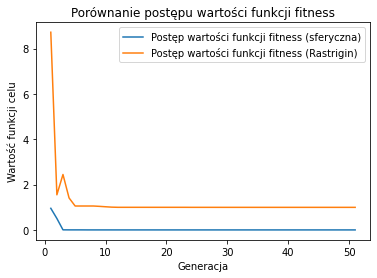

In [43]:
import random
import numpy as np
import matplotlib.pyplot as plt


class Individual:
    def __init__(self, dimensions, min_value, max_value):
        self.dimensions = dimensions
        self.min_value = min_value
        self.max_value = max_value
        self.chromosome = self.generate_chromosome()
        self.fitness = None

    def generate_chromosome(self):
        return [random.uniform(self.min_value, self.max_value) for _ in range(self.dimensions)]

    def evaluate_fitness(self, fitness_func):
        self.fitness = fitness_func(self.chromosome)


def sphere(chromosome):
    return np.sum(np.square(chromosome))


def rastrigin(chromosome):
    A = 10
    n = len(chromosome)
    chromosome = np.array(chromosome)
    return A * n + np.sum(np.square(chromosome) - A * np.cos(2 * np.pi * chromosome))


def tournament_selection(population, tournament_size):
    participants = random.sample(population, tournament_size)
    return min(participants, key=lambda individual: individual.fitness)


def uniform_crossover(parent1, parent2, crossover_rate):
    if random.random() < crossover_rate:
        child = Individual(parent1.dimensions, parent1.min_value, parent1.max_value)
        child.chromosome = [parent1.chromosome[i] if random.random() < 0.5 else parent2.chromosome[i]
                            for i in range(parent1.dimensions)]
        return child
    else:
        return parent1


def gaussian_mutation(individual, mutation_rate, mutation_scale):
    for i in range(individual.dimensions):
        if random.random() < mutation_rate:
            individual.chromosome[i] = individual.chromosome[i] + random.gauss(0, mutation_scale)
            individual.chromosome[i] = max(individual.min_value, min(individual.chromosome[i], individual.max_value))


def genetic_algorithm(population_size, dimensions, min_value, max_value, fitness_func, tournament_size, crossover_rate,
                      mutation_rate, mutation_scale, num_generations):
    population = [Individual(dimensions, min_value, max_value) for _ in range(population_size)]

    for individual in population:
        individual.evaluate_fitness(fitness_func)

    best_solution = min(population, key=lambda individual: individual.fitness)
    fitness_progress = [best_solution.fitness]

    for generation in range(num_generations):
        new_population = []

        while len(new_population) < population_size:
            parent1 = tournament_selection(population, tournament_size)
            parent2 = tournament_selection(population, tournament_size)
            offspring = uniform_crossover(parent1, parent2, crossover_rate)
            gaussian_mutation(offspring, mutation_rate, mutation_scale)
            offspring.evaluate_fitness(fitness_func)
            new_population.append(offspring)

        population = new_population

        best_solution = min(population + [best_solution], key=lambda individual: individual.fitness)
        fitness_progress.append(best_solution.fitness)

        print(f"Generation {generation + 1}: Best Fitness = {best_solution.fitness}")

    return best_solution, fitness_progress


def plot_fitness_progress(fitness_progress_sphere, fitness_progress_rastrigin):
    generations = range(1, len(fitness_progress_sphere) + 1)
    plt.plot(generations, fitness_progress_sphere, label='Postęp wartości funkcji fitness (sferyczna)')
    plt.plot(generations, fitness_progress_rastrigin, label='Postęp wartości funkcji fitness (Rastrigin)')
    plt.xlabel('Generacja')
    plt.ylabel('Wartość funkcji celu')
    plt.title('Porównanie postępu wartości funkcji fitness')
    plt.legend()
    plt.show()


# Parametry algorytmu
population_size = 100
dimensions = 2
min_value = -5.12
max_value = 5.12
tournament_size = 3
crossover_rate = 0.8
mutation_rate = 0.1
mutation_scale = 0.1
num_generations = 50

# Uruchomienie algorytmu dla funkcji sferycznej
best_solution_sphere, fitness_progress_sphere = genetic_algorithm(population_size, dimensions, min_value, max_value,
                                                                  sphere, tournament_size, crossover_rate,
                                                                  mutation_rate, mutation_scale, num_generations)

print("Najlepsze rozwiązanie dla funkcji sferycznej:")
print(f"Chromosom = {best_solution_sphere.chromosome}")
print(f"Wartość funkcji celu = {best_solution_sphere.fitness}")

# Uruchomienie algorytmu dla funkcji Rastrigina
best_solution_rastrigin, fitness_progress_rastrigin = genetic_algorithm(population_size, dimensions, min_value,
                                                                        max_value, rastrigin, tournament_size,
                                                                        crossover_rate, mutation_rate, mutation_scale,
                                                                        num_generations)

print("Najlepsze rozwiązanie dla funkcji Rastrigina:")
print(f"Chromosom = {best_solution_rastrigin.chromosome}")
print(f"Wartość funkcji celu = {best_solution_rastrigin.fitness}")

# Wykresy postępu wartości funkcji fitness
plot_fitness_progress(fitness_progress_sphere, fitness_progress_rastrigin)